## Compare all runs
This notebook compares the bulk properties (eg. integrated PV, density profiles) across all the runs. The point is to look for large-scale changes between coupled/uncoupled simulations, and see how MLD vs no-MLD matters.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from dask.distributed import Client

import dask
import xarray as xr
import xgcm
from dask.diagnostics import ProgressBar
import sys
import matplotlib.patches as patches
sys.path.append('/homes/metofac/wenegrat/xroms/')
sys.path.append('/homes/metofac/wenegrat/pyspec/')

#from xroms import open_roms_netcdf_dataset
import cmocean.cm as cmo
import xroms
from pyspec import spectrum as spec
from scipy import integrate as integrate
from timeit import default_timer as timer

#%%
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 14
plt.rcParams['contour.negative_linestyle'] = 'solid'

import sys
sys.path.append("../src/")
import load_model_runs as lruns

from importlib import reload  
import time
from glob import glob


In [12]:
client = Client(processes=True)
client

/homes/metofac/wenegrat/miniconda3/envs/CFB_EBF/lib/python3.6/site-packages/distributed/dashboard/core.py:79: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


Client Scheduler: tcp://127.0.0.1:36440 Dashboard: http://127.0.0.1:37351/status,Cluster Workers: 16 Cores: 128 Memory: 540.52 GB


In [3]:
# Load all 4 runs

reload(lruns)

chunks = {'time':5, 'eta_rho':1000, 'eta_v':1000}
chunks = {'time':1}

dsNML_WC, gridNML_WC = lruns.loadRun('../data/model/JET_NML_CFB/', chunks=chunks, old=False, avg=False)
dsNML_NC, gridNML_NC = lruns.loadRun('../data/model/JET_NML_NOCFB/', chunks=chunks, old=False, avg=False)

dsML_WC, gridML_WC = lruns.loadRun('../data/model/JET_ML_CFB/', chunks=chunks, old=False, avg=False)
dsML_NC, gridML_NC = lruns.loadRun('../data/model/JET_ML_NOCFB/', chunks=chunks, old=False, avg=False)

here
and here
here
and here
here
and here
here
and here


In [ ]:
files = sorted(glob('../data/model/JET_ML_CFB/jet_his.*.nc'))
chunks = {'time':5}

dsRAW = xr.open_mfdataset(files, combine='nested', concat_dim='time', decode_cf=False,
                         data_vars='minimal', chunks=chunks, coords='minimal',compat='override', parallel=True)
dsRAW


In [4]:
#gridML_WC.derivative(dsRAW.v.isel(s_rho=slice(-2,-1)), 'X').isel(s_rho=-1).compute()
print('here')
gridML_WC.derivative(dsML_WC.v.isel(s_rho=slice(-2,-1)), 'X').compute()


here


<xarray.DataArray (ocean_time: 47, s_rho: 1, eta_v: 4001, xi_u: 1001)>
array([[[[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         ...,
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00]]],


       [[[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 3.9494810e-10, -1.9866093e-10, -1.9866093e-10, ...,
          -1.9866093e-10, -1.9866185e-10,  3.9494810e-10],
         [ 7.8989620e-10, -3.9732187e-10, -3.9732187e-10, ...,
...
         [ 1.3883483e-06,  1.7299701e-06,  1.8933636e-06, ...,
          -4.0749509e-07,  5.6935386e-07,  1.3883483e-06],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00]]],


       [[[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 1.4163462e-07,  7.9681172e-08,  6.4261263e-10, ...,
           8.9775774e-08,  1.4795178e-07,  1.4163462e-07],
         [ 1.7721440e-07,  3.1914297e-07,  3.7310508e-07, ...,
          -2.1190279e-07, -1.9108528e-08,  1.7721440e-07],
         ...,
         [ 1.1550010e-05, -4.9849341e-06, -1.5363727e-05, ...,
           4.6975736e-05,  3.2639771e-05,  1.1550010e-05],
         [-6.7096998e-06, -1.1415808e-05, -1.0280647e-05, ...,
           9.7928450e-06,  2.1729443e-06, -6.7096998e-06],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00]]]],
      dtype=float32)
Coordinates:
  * ocean_time  (ocean_time) float64 9.969e+36 3.11e+07 ... 3.491e+07 3.499e+07
  * s_rho       (s_rho) float32 -0.015
  * eta_v       (eta_v) int64 0 1 2 3 4 5 6 ... 3995 3996 3997 3998 3999 4000
  * xi_u        (xi_u) int64 0 1 2 3 4 5 6 7 ... 994 995 996 997 998 999 1000

In [13]:
dsOLD, gridOLD = lruns.loadRun('../data/model/jet_his_20_WC.nc', chunks=chunks, old=True)

dsML_WC['f'] = dsOLD.f
#dsML_NC['f'] = dsOLD.f
#dsNML_WC['f'] = dsOLD.f
#dsNML_NC['f'] = dsOLD.f

In [15]:
dsOLD

<xarray.Dataset>
Dimensions:     (auxil: 4, eta_rho: 4002, eta_v: 4001, ocean_time: 41, s_rho: 60, s_w: 61, xi_rho: 1002, xi_u: 1001)
Coordinates:
  * xi_rho      (xi_rho) int64 0 1 2 3 4 5 6 7 ... 995 996 997 998 999 1000 1001
  * xi_u        (xi_u) int64 0 1 2 3 4 5 6 7 ... 994 995 996 997 998 999 1000
  * eta_rho     (eta_rho) int64 0 1 2 3 4 5 6 ... 3996 3997 3998 3999 4000 4001
  * eta_v       (eta_v) int64 0 1 2 3 4 5 6 ... 3995 3996 3997 3998 3999 4000
  * s_rho       (s_rho) float32 -0.9917 -0.975 -0.9583 ... -0.025 -0.008333
  * s_w         (s_w) float32 -1.0 -0.9833 -0.9667 ... -0.03333 -0.01667 0.0
    x_rho       (eta_rho, xi_rho) float32 dask.array<chunksize=(4002, 1002), meta=np.ndarray>
    y_rho       (eta_rho, xi_rho) float32 dask.array<chunksize=(4002, 1002), meta=np.ndarray>
  * ocean_time  (ocean_time) float64 1.4e+07 1.408e+07 ... 1.737e+07 1.745e+07
    z_w         (ocean_time, s_w, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 61, 4002, 1002), meta=np.ndarray>
    z_w_u       (ocean_time, s_w, eta_rho, xi_u) float32 dask.array<chunksize=(1, 61, 4002, 1001), meta=np.ndarray>
    z_w_v       (ocean_time, s_w, eta_v, xi_rho) float32 dask.array<chunksize=(1, 61, 4001, 1002), meta=np.ndarray>
    z_w_psi     (ocean_time, s_w, eta_v, xi_u) float32 dask.array<chunksize=(1, 61, 4001, 1001), meta=np.ndarray>
    z_rho       (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 60, 4002, 1002), meta=np.ndarray>
    z_rho_u     (ocean_time, s_rho, eta_rho, xi_u) float32 dask.array<chunksize=(1, 60, 4002, 1001), meta=np.ndarray>
    z_rho_v     (ocean_time, s_rho, eta_v, xi_rho) float32 dask.array<chunksize=(1, 60, 4001, 1002), meta=np.ndarray>
    z_rho_psi   (ocean_time, s_rho, eta_v, xi_u) float32 dask.array<chunksize=(1, 60, 4001, 1001), meta=np.ndarray>
    z_rho0      (s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(60, 4002, 1002), meta=np.ndarray>
    z_rho_u0    (s_rho, eta_rho, xi_u) float32 dask.array<chunksize=(60, 4002, 1001), meta=np.ndarray>
    z_rho_v0    (s_rho, eta_v, xi_rho) float32 dask.array<chunksize=(60, 4001, 1002), meta=np.ndarray>
    z_rho_psi0  (s_rho, eta_v, xi_u) float32 dask.array<chunksize=(60, 4001, 1001), meta=np.ndarray>
    z_w0        (s_w, eta_rho, xi_rho) float32 dask.array<chunksize=(61, 4002, 1002), meta=np.ndarray>
    z_w_u0      (s_w, eta_rho, xi_u) float32 dask.array<chunksize=(61, 4002, 1001), meta=np.ndarray>
    z_w_v0      (s_w, eta_v, xi_rho) float32 dask.array<chunksize=(61, 4001, 1002), meta=np.ndarray>
    z_w_psi0    (s_w, eta_v, xi_u) float32 dask.array<chunksize=(61, 4001, 1001), meta=np.ndarray>
Dimensions without coordinates: auxil
Data variables:
    spherical   int64 0
    xl          float32 ...
    el          float32 ...
    Vtransform  float32 ...
    sc_r        (s_rho) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    sc_w        (s_w) float32 dask.array<chunksize=(61,), meta=np.ndarray>
    Cs_r        (s_rho) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    Cs_w        (s_w) float32 dask.array<chunksize=(61,), meta=np.ndarray>
    hc          float32 ...
    h           (eta_rho, xi_rho) float32 dask.array<chunksize=(4002, 1002), meta=np.ndarray>
    f           (eta_rho, xi_rho) float32 dask.array<chunksize=(4002, 1002), meta=np.ndarray>
    pm          (eta_rho, xi_rho) float32 dask.array<chunksize=(4002, 1002), meta=np.ndarray>
    pn          (eta_rho, xi_rho) float32 dask.array<chunksize=(4002, 1002), meta=np.ndarray>
    time_step   (ocean_time, auxil) int32 dask.array<chunksize=(1, 4), meta=np.ndarray>
    scrum_time  (ocean_time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    u           (ocean_time, s_rho, eta_rho, xi_u) float32 dask.array<chunksize=(1, 60, 4002, 1001), meta=np.ndarray>
    v           (ocean_time, s_rho, eta_v, xi_rho) float32 dask.array<chunksize=(1, 60, 4001, 1002), meta=np.ndarray>
    rho         (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 60,

In [131]:
def calcIntPV(ds, grid, el=[0,-1], sl = [0,-1]):
    rhotob = -9.8/1020
    
    vx = xroms.to_rho(grid.derivative(ds.v, 'X'),grid)

    uy = xroms.to_rho(grid.derivative(ds.u, 'Y'),grid)
    uz = xroms.to_rho(grid.interp(grid.derivative(ds.u, 'Z', boundary='extend'),'Z',to='center', boundary='extend'),grid)

    zslice = slice(sl[0], sl[-1])
    ei = el[-1]
    face1 = (rhotob*ds.rho.isel(eta_rho=ei, s_rho=zslice)*uz.isel(eta_rho=ei, s_rho=zslice)*ds.dz.isel(eta_rho=ei)*ds.dx.isel(eta_rho=ei)).sum(('xi_rho', 's_rho'))
    ei = el[0]
    face2 = (rhotob*ds.rho.isel(eta_rho=ei, s_rho=zslice)*uz.isel(eta_rho=ei, s_rho=zslice)*ds.dz.isel(eta_rho=ei)*ds.dx.isel(eta_rho=ei)).sum(('xi_rho', 's_rho'))
    termy = face1.compute() - face2.compute()
    

    #yslice = slice(el[0], el[-1])
    #si = sl[-1]
    #face1 = (rhotob*ds.rho.isel(s_rho=si, eta_rho=yslice)*(ds.f.isel(eta_rho=yslice)+vx.isel(s_rho=si, eta_rho=yslice)-uy.isel(s_rho=si, eta_rho=yslice))*ds.dx.isel(eta_rho=yslice)*ds.dy.isel(eta_rho=yslice)).sum(('xi_rho','eta_rho'))
    #si = sl[0]
    #face2 = (rhotob*ds.rho.isel(s_rho=si)*(ds.f+vx.isel(s_rho=si)-uy.isel(s_rho=si))*ds.dx*ds.dy).isel(eta_rho=slice(el[0], el[-1])).sum(('xi_rho','eta_rho'))

    #termz = face1.compute()-face2.compute()
    return termy# + termz

def calcIntPV2(ds, grid, el=[0,-1], sl = [0,-1]):
    rhotob = -9.8/1020
    

    
    zslice = slice(sl[0], sl[-1])
    
    ei = el[-1]
    #uz = xroms.to_rho(grid.interp(grid.derivative(ds.u.isel(eta_rho=slice(ei-1, ei)), 'Z', boundary='extend'),'Z',to='center', boundary='extend'),grid)
    uz = grid.diff(dst.u.isel(eta_rho=slice(ei-1, ei)), 'Z', boundary='extend')
    dz = grid.diff(dst.dz_u0.isel(eta_rho=slice(ei-1,ei)), 'Z', boundary='extend')
    uz = uz/dz
    uz = xroms.to_rho(grid.interp(uz,'Z',to='center', boundary='extend'),grid)
    b = rhotob*dst.rho.isel(eta_rho=slice(ei-1,ei))
    term = b*uz*dst.dz0.isel(eta_rho=slice(ei-1,ei))*dst.dx.isel(eta_rho=slice(ei-1,ei))
    face1 = term.isel(s_rho=zslice, eta_rho=-1).sum(('xi_rho', 's_rho')).values
    ei = el[0]
    #uz = xroms.to_rho(grid.interp(grid.derivative(ds.u.isel(eta_rho=slice(ei-1, ei)), 'Z', boundary='extend'),'Z',to='center', boundary='extend'),grid)
    
    uz = grid.diff(dst.u.isel(eta_rho=slice(ei-1, ei)), 'Z', boundary='extend')
    dz = grid.diff(dst.dz_u0.isel(eta_rho=slice(ei-1,ei)), 'Z', boundary='extend')
    uz = uz/dz
    uz = xroms.to_rho(grid.interp(uz,'Z',to='center', boundary='extend'),grid)
    b = rhotob*dst.rho.isel(eta_rho=slice(ei-1,ei))
    term = b*uz*dst.dz0.isel(eta_rho=slice(ei-1,ei))*dst.dx.isel(eta_rho=slice(ei-1,ei))
    face2 = term.isel(s_rho=zslice, eta_rho=-1).sum(('xi_rho', 's_rho')).values
    termy = face1 - face2
    #termy = face1 
    
    f = xroms.to_psi(ds.f, grid)
    yslice = slice(el[0], el[-1])

    si = sl[-1]    
    b = xroms.to_psi(rhotob*dst.rho.isel(s_rho=slice(si-1,si)), grid)
    vx = grid.derivative(ds.v.isel(s_rho=slice(si-1, si)), 'X')
    uy = grid.derivative(ds.u.isel(s_rho=slice(si-1, si)), 'Y')
    term = b*(f+vx-uy)*ds.dx_psi*ds.dy_psi
    face1 = term.isel( eta_v=yslice).sum(('xi_u','eta_v')).values
    si = sl[0]
    b = xroms.to_psi(rhotob*dst.rho.isel(s_rho=slice(si-1,si)), grid)
    vx = grid.derivative(ds.v.isel(s_rho=slice(si-1, si)), 'X')
    uy = grid.derivative(ds.u.isel(s_rho=slice(si-1, si)), 'Y')
    term = b*(f+vx-uy)*ds.dx_psi*ds.dy_psi
    face2 = term.isel( eta_v=yslice).sum(('xi_u','eta_v')).values
    
    termz = face1-face2
    return termy.flatten() + termz.flatten()

def calcPVTimesteps(dst, grid, el, sl):
    pv = np.zeros((35,))
    for ti in range(0, 6, 5):
        print(f'Timestep {ti}-{ti+5}')
        pv[ti:ti+5] = calcIntPV2(dst.isel(time=slice(ti, ti+5)), grid, el, sl)
        print('here')
    return pv

In [132]:
import gc
import time
gc.collect()

tic = time.time()
el = [250, 3750]
#el = [0, -1]
sl = [80, -1]

# First do ML with CFB

dst = dsML_WC
grid = gridML_WC
dst = dst.swap_dims({'ocean_time':'time'}) # Need for new runs

#PVML_WC = calcIntPV2(dst, grid, el=el, sl=sl)
PVML_WC = calcPVTimesteps(dst, grid, el, sl)
#PVML_WC = PVML_WC.swap_dims({'ocean_time':'time'})
PVML_WC
toc = time.time()
print(f'This took {(toc-tic)/60} minutes')

distributed.utils_perf - WARNING - full garbage collections took 42% CPU time recently (threshold: 10%)


Timestep 0-5


distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

ValueError: operands could not be broadcast together with shapes (47,) (5,) 

distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


In [109]:
face1.flatten() + face2.flatten()

array([       nan,  73641.11 , 136862.5  , 101136.625, 103977.75 ],
      dtype=float32)

distributed.utils_perf - WARNING - full garbage collections took 40% CPU time recently (threshold: 10%)


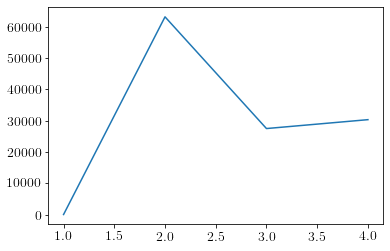

distributed.utils_perf - WARNING - full garbage collections took 39% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 39% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 39% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 40% CPU time recently (threshold: 10%)


In [112]:
plt.plot(PVML_WC - PVML_WC[1])

In [ ]:
ei = el[-1]
uz = grid.diff(dst.u.isel(eta_rho=slice(ei-1, ei)), 'Z', boundary='extend')
dz = grid.diff(dst.dz_u0.isel(eta_rho=slice(ei-1,ei)), 'Z', boundary='extend')
uz = uz/dz
uz = xroms.to_rho(grid.interp(uz,'Z',to='center', boundary='extend'),grid)
b = dst.rho.isel(eta_rho=slice(ei-1,ei))
term = b*uz*dst.dz0.isel(eta_rho=slice(ei-1,ei))*dst.dx.isel(eta_rho=slice(ei-1,ei))
face1 = term.isel(eta_rho=-1).sum(('xi_rho', 's_rho'))
face1.compute()

In [ ]:
#dst.u.isel(eta_rho=slice(ei-1,ei)).compute()
uz.compute()

In [ ]:
dst.u.isel(eta_rho=slice(ei-1, ei))

In [ ]:
grid

In [47]:
grid

NameError: name 'grid' is not defined

distributed.utils_perf - WARNING - full garbage collections took 43% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 50% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 50% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 50% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 50% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 50% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 50% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 50% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 50% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

In [45]:
ylim = slice(1500,2500)
ML_WC = dsML_WC.isel(eta_rho=ylim).hbl.mean(('eta_rho', 'xi_rho')).compute()
ML_NC = dsML_NC.isel(eta_rho=ylim).hbl.mean(('eta_rho', 'xi_rho')).compute()
NML_WC = dsNML_WC.isel(eta_rho=ylim).hbl.mean(('eta_rho', 'xi_rho')).compute()
NML_NC = dsNML_NC.isel(eta_rho=ylim).hbl.mean(('eta_rho', 'xi_rho')).compute()

distributed.utils_perf - WARNING - full garbage collections took 40% CPU time recently (threshold: 10%)


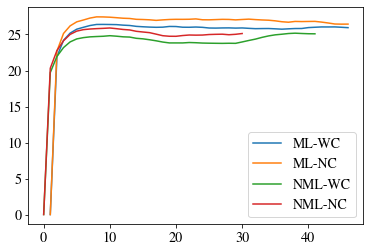

distributed.utils_perf - WARNING - full garbage collections took 40% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 40% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 40% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 40% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 41% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 41% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 41% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 42% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 45% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

In [46]:
plt.rcParams['text.usetex'] = False
plt.plot(ML_WC, label='ML-WC')
plt.plot(ML_NC, label='ML-NC')
plt.plot(NML_WC, label='NML-WC')
plt.plot(NML_NC, label='NML-NC')
plt.legend()

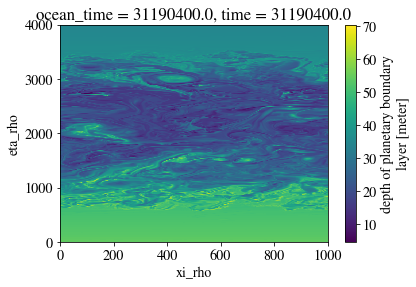

distributed.utils_perf - WARNING - full garbage collections took 40% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 40% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 41% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 41% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 41% CPU time recently (threshold: 10%)


In [44]:
dsML_WC.hbl.isel(ocean_time=2).plot()

In [33]:
flim = slice(1500,2500)


wp = dsML_WC.w.isel(eta_rho=flim) - dsML_WC.w.isel(eta_rho=flim).mean(('eta_rho', 'xi_rho'))
bp = dsML_WC.temp.isel(eta_rho=flim) - dsML_WC.temp.isel(eta_rho=flim).mean(('eta_rho', 'xi_rho'))

wpbp_WC = (wp*bp).mean(('eta_rho', 'xi_rho'))


wp = dsML_NC.w.isel(eta_rho=flim) - dsML_NC.w.isel(eta_rho=flim).mean(('eta_rho', 'xi_rho'))
bp = dsML_NC.temp.isel(eta_rho=flim) - dsML_NC.temp.isel(eta_rho=flim).mean(('eta_rho', 'xi_rho'))

wpbp_NC = (wp*bp).mean(('eta_rho', 'xi_rho'))


In [4]:
flim = slice(1500,2500)


wp = dsML_WC.w.isel(eta_rho=flim) - dsML_WC.w.isel(eta_rho=flim).mean(( 'xi_rho'))
bp = dsML_WC.temp.isel(eta_rho=flim) - dsML_WC.temp.isel(eta_rho=flim).mean(( 'xi_rho'))

wpbp_WC = (wp*bp).mean(('eta_rho', 'xi_rho'))


wp = dsML_NC.w.isel(eta_rho=flim) - dsML_NC.w.isel(eta_rho=flim).mean(('xi_rho'))
bp = dsML_NC.temp.isel(eta_rho=flim) - dsML_NC.temp.isel(eta_rho=flim).mean(( 'xi_rho'))

wpbp_NC = (wp*bp).mean(('eta_rho', 'xi_rho'))


(-2000, 0)

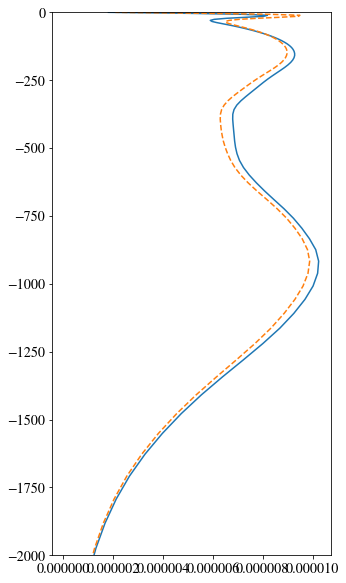

In [9]:
ts = slice(30, 45)
plt.figure(figsize=(5, 10))
plt.plot( wpbp_WC.isel(ocean_time=ts).mean('ocean_time'), dsML_WC.z_rho0.mean(('eta_rho', 'xi_rho')) )
plt.plot( wpbp_NC.isel(ocean_time=ts).mean('ocean_time'), dsML_NC.z_rho0.mean(('eta_rho', 'xi_rho')), linestyle='--' )

#ts = slice(40, 45)
#plt.plot( wpbp_WC.isel(ocean_time=ts).mean('ocean_time'), dsML_WC.z_rho0.mean(('eta_rho', 'xi_rho')) )
#plt.plot( wpbp_NC.isel(ocean_time=ts).mean('ocean_time'), dsML_NC.z_rho0.mean(('eta_rho', 'xi_rho')), linestyle='--' )

plt.ylim(-2000, 0)

In [38]:
dsNML_WC

<xarray.Dataset>
Dimensions:     (auxil: 4, eta_rho: 4002, eta_v: 4001, ocean_time: 42, s_rho: 100, s_w: 101, xi_rho: 1002, xi_u: 1001)
Coordinates:
  * eta_rho     (eta_rho) int64 0 1 2 3 4 5 6 ... 3996 3997 3998 3999 4000 4001
  * eta_v       (eta_v) int64 0 1 2 3 4 5 6 ... 3995 3996 3997 3998 3999 4000
  * s_rho       (s_rho) float32 -0.995 -0.985 -0.975 ... -0.025 -0.015 -0.005
  * xi_rho      (xi_rho) int64 0 1 2 3 4 5 6 7 ... 995 996 997 998 999 1000 1001
  * xi_u        (xi_u) int64 0 1 2 3 4 5 6 7 ... 994 995 996 997 998 999 1000
  * s_w         (s_w) float32 -1.0 -0.99 -0.98 -0.97 ... -0.03 -0.02 -0.01 0.0
    x_rho       (eta_rho, xi_rho) float32 dask.array<chunksize=(4002, 1002), meta=np.ndarray>
    y_rho       (eta_rho, xi_rho) float32 dask.array<chunksize=(4002, 1002), meta=np.ndarray>
  * ocean_time  (ocean_time) float64 3.11e+07 3.119e+07 ... 3.456e+07 3.465e+07
    time        (ocean_time) float64 3.11e+07 3.119e+07 ... 3.456e+07 3.465e+07
    z_w         (ocean_time, s_w, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 101, 4002, 1002), meta=np.ndarray>
    z_w_u       (ocean_time, s_w, eta_rho, xi_u) float32 dask.array<chunksize=(1, 101, 4002, 1001), meta=np.ndarray>
    z_w_v       (ocean_time, s_w, eta_v, xi_rho) float32 dask.array<chunksize=(1, 101, 4001, 1002), meta=np.ndarray>
    z_w_psi     (ocean_time, s_w, eta_v, xi_u) float32 dask.array<chunksize=(1, 101, 4001, 1001), meta=np.ndarray>
    z_rho       (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 100, 4002, 1002), meta=np.ndarray>
    z_rho_u     (ocean_time, s_rho, eta_rho, xi_u) float32 dask.array<chunksize=(1, 100, 4002, 1001), meta=np.ndarray>
    z_rho_v     (ocean_time, s_rho, eta_v, xi_rho) float32 dask.array<chunksize=(1, 100, 4001, 1002), meta=np.ndarray>
    z_rho_psi   (ocean_time, s_rho, eta_v, xi_u) float32 dask.array<chunksize=(1, 100, 4001, 1001), meta=np.ndarray>
    z_rho0      (s_rho, eta_rho, xi_rho) float32 -3.903e+03 ... -1.814
    z_rho_u0    (s_rho, eta_rho, xi_u) float32 -3.903e+03 -3.903e+03 ... -1.814
    z_rho_v0    (s_rho, eta_v, xi_rho) float32 -3.903e+03 -3.903e+03 ... -1.814
    z_rho_psi0  (s_rho, eta_v, xi_u) float32 -3.903e+03 -3.903e+03 ... -1.814
    z_w0        (s_w, eta_rho, xi_rho) float32 -4e+03 -4e+03 -4e+03 ... 0.0 0.0
    z_w_u0      (s_w, eta_rho, xi_u) float32 -4e+03 -4e+03 -4e+03 ... 0.0 0.0
    z_w_v0      (s_w, eta_v, xi_rho) float32 -4e+03 -4e+03 -4e+03 ... 0.0 0.0
    z_w_psi0    (s_w, eta_v, xi_u) float32 -4e+03 -4e+03 -4e+03 ... 0.0 0.0 0.0
Dimensions without coordinates: auxil
Data variables:
    spherical   int64 0
    xl          float32 ...
    el          float32 ...
    Vtransform  float32 ...
    sc_r        (s_rho) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    sc_w        (s_w) float32 dask.array<chunksize=(101,), meta=np.ndarray>
    Cs_r        (s_rho) float32 ...
    Cs_w        (s_w) float32 ...
    hc          float32 ...
    h           (eta_rho, xi_rho) float32 4e+03 4e+03 4e+03 ... 4e+03 4e+03
    f           (eta_rho, xi_rho) float32 dask.array<chunksize=(4002, 1002), meta=np.ndarray>
    pm          (eta_rho, xi_rho) float32 0.002 0.002 0.002 ... 0.002 0.002
    pn          (eta_rho, xi_rho) float32 0.002 0.002 0.002 ... 0.002 0.002
    time_step   (ocean_time, auxil) int32 dask.array<chunksize=(1, 4), meta=np.ndarray>
    zeta        (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 4002, 1002), meta=np.ndarray>
    u           (ocean_time, s_rho, eta_rho, xi_u) float32 dask.array<chunksize=(1, 100, 4002, 1001), meta=np.ndarray>
    v           (ocean_time, s_rho, eta_v, xi_rho) float32 dask.array<chunksize=(1, 100, 4001, 1002), meta=np.ndarray>
    temp        (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 100, 4002, 1002), meta=np.ndarray>
    w           (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 100, 4002, 1002), meta=np.ndarray>
    sustr       (ocean_time, eta_rho, xi_u) flo

distributed.utils_perf - WARNING - full garbage collections took 39% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 39% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 40% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 40% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 40% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 40% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 40% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 40% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 40% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took